In [1]:
# import des packages nécessaires à l'exécution du code 

import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Lasso

In [2]:
df_model = pd.read_csv('data_cleaned.csv')

In [3]:
X = df_model[['m2_living','grade','view','m2_above','bathrooms','zipcode','m2_basement','bedrooms','waterfront','floors','yr_renovated','m2_lot','yr_built','condition']]
y = df_model['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=420)

numeric_features = list(X.drop(['view'],axis=1).select_dtypes(include=['float64','int64']).columns)
catagorical_features = ['zipcode','view']

numeric_transformer = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('robust', RobustScaler())
])

catagorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', catagorical_transformer, catagorical_features)
    ])

param_grid= {'alpha':[0.1,1,10]} 

grid = GridSearchCV(Lasso(), param_grid, cv=5)

grid.fit(X_train, y_train)
regression = grid.best_estimator_


pipe = Pipeline([
    ('prep',preprocessor),
    ('reg',regression)
                
])

/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.519e+13, tolerance: 1.843e+11
  model = cd_fast.enet_coordinate_descent(
/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.437e+13, tolerance: 1.790e+11
  model = cd_fast.enet_coordinate_descent(
/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

In [4]:

trained_pipe = pipe.fit(X_train, y_train)
predictions = trained_pipe.predict(X_test)
trained_pipe.score(X_test, y_test)


/home/apprenant/miniconda3/envs/machine-learning/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.586e+14, tolerance: 2.255e+11
  model = cd_fast.enet_coordinate_descent(


0.8788393952319745

In [5]:
print(y_test)
print(predictions)

8878     289900.0
14851    345000.0
1564     610000.0
4055     363000.0
7526     376000.0
           ...   
8892     440000.0
14761    530000.0
14288    400000.0
7275     693000.0
20522    374500.0
Name: price, Length: 4322, dtype: float64
[282163.59241715 340807.66926766 504859.63204664 ... 384597.0830908
 677704.52250528 493919.92600142]


In [6]:
data = {
    'bedrooms': [4],
    'bathrooms': [1.0],
    'm2_living': [197.91584],
    'm2_lot': [1052.370936],
    'floors': [2.0],
    'waterfront': [1],
    'view': [0],
    'condition': [3],
    'grade': [7],
    'm2_above': [178.91584],
    'yr_built': [1950],
    'zipcode': [98198],
    'm2_basement': [0],
    'yr_renovated': [2005]
}

X_test = pd.DataFrame(data)

y_pred = pipe.predict(X_test)
print(y_pred)

[516589.88313091]


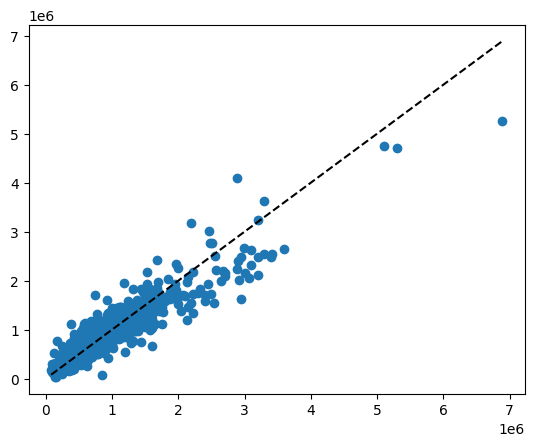

In [7]:
plt.scatter(y_test,predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')


In [8]:
## Sauvegarde avec pickle
with open('model.pickle2','wb') as f: 
    pickle.dump(trained_pipe,f)